# Mid-term Exam

## 1.  Import the spam dataset and print the first six rows.  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as GLM
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

In [12]:
spam = pd.read_csv('C:/Users/Administrator/Desktop/CU/CU_SM2022/QMSSS5073_001_2022_2 - MACHINE LEARNING SOC SCI/mt/spam_dataset.csv')
spam.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

- I think "word_freq_000:", "char_freq_\\$:", and "capital_run_length_longest:" will be important predictors in the model of spam. First, most spam are delusive because it attract people with fraud with receiving a bonus, a check in a greatcertain amount of number, for example, click to get \\$1,000! Second, spam usually come with money(\\$) as bait. Typically, there are only a few dollar sign in common contact. Most contract with numerous dollar signs are in pdf or other file format rather than text. Third, spam tend to use longer capitalized exaggerated words to attract people's customer, for example, "INCREDIBLE COUPONS FOR \\$1,000!" which seldom appears in normal email.

## 3.  Visualize the univariate distribution of each of the variables in the previous question.  

Text(0, 0.5, 'counts')

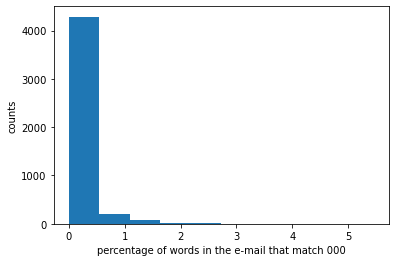

In [13]:
plt.hist(spam['word_freq_000:'])
plt.xlabel('percentage of words in the e-mail that match 000')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

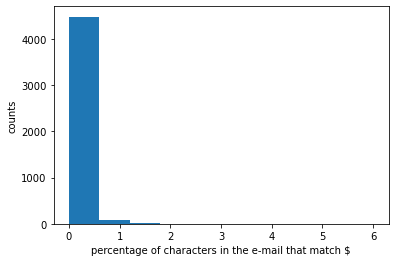

In [14]:
plt.hist(spam['char_freq_$:'])
plt.xlabel('percentage of characters in the e-mail that match $')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

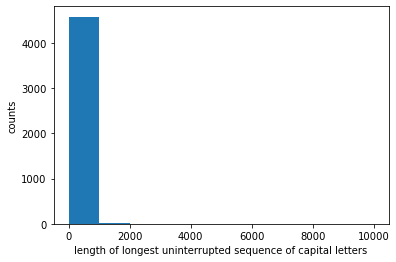

In [15]:
plt.hist(spam['capital_run_length_longest:'])
plt.xlabel('length of longest uninterrupted sequence of capital letters')
plt.ylabel('counts')

## 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

- 1. K Nearest Neighbors Classifier (KNeighborsClassifier) 
- 2. Logistic Regression(LogisticRegression) 
- 3. Decision Tree Classifier (DecisionTreeClassifier) 
- 4. Bagging Classifier (BaggingClassifier) 
- 5. Random Forest Classifier (RandomForestClassifier) 
- 6. Gradient Boost (GradientBoostingClassifier) 
- 7. XGBoosting Classifier (XGBClassifier) 
- 8. Support Vector Machine (SVC)

## 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

- We ought to seperate data into train and test dataset since we need to prevent our model from overfitting which is more likely appearing in using all data to training the model. If all data are used to train the model, the model might works well in the sample data, but high likely won't have a good prediction in data unseen.

## 6. What is k-fold cross validation and what do we use it for?

- K-fold cross validation divides the sample data into k groups (folds). We use it for evaluating the machine learning model since certain models might perform well or terrible by chance with certain train and test set.

## 7. How is k-fold cross validation different from stratified k-fold cross validation?

- K-fold cross validation is different from stratified k-fold cross validation. K-fold cross validation divides the sample dataset into k folds randomly. Stratified k-fold cross validation divides sample dataset into k folds with same proportion of observations with a given label.

## 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

### A) On test data directly 

In [16]:
# split dataset into train & test
X = spam[["word_freq_000:", "char_freq_$:", "capital_run_length_longest:"]]
y = spam.spam
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=3)

In [17]:
# KNN without cv
knc = KNC(n_neighbors=5).fit(X_train, y_train)
knc_score = knc.score(X_test, y_test)
print(f"knc score: {knc_score}")

knc score: 0.8123370981754996


In [228]:
param_grid = {'n_neighbors': range(1, 10)}

grid = GridSearchCV(KNC(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(f"Best parameter: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameter: {'n_neighbors': 6}
Best score: 0.8020289855072462


- The reason why I choose 5 as number of neighbors are that 
1) Number of neighbors should be an ODD number in case there is a tie. 
2) Number of neighbors cannot be too small, for example 1, because the noise will have a higher influence on the result.
3) Number of neighbors cannot be too large, for example over 10, since it is computationally expensive.
4) k=sqrt(n) is one way, but it does not work well in this case.
5) The sample size is not big and hyper prarmeter tuning shows that the best number of neighbors is 6.
6) I choose closest two to 6, which are 5 and 7. 5 performs better.

### B) using k-fold cross-validation.

In [18]:
# create cv
kfold = KFold(n_splits=5)

In [19]:
# KNN with cv
knc = KNC(n_neighbors=5)
knc_kfold = mean(cross_val_score(knc, X_test, y_test, cv=kfold))
print(f"KFold knc score: {knc_kfold}")

KFold knc score: 0.776755128929042


- knc score: 0.8123370981754996
- KFold knc score: 0.7965217391304348

It is not surprising that score in KNN without cross validation is higher than KNN with KFold cross validation since K-fold cross validation divides the sample dataset into k folds randomly to evaluate the general performance of the model.

## 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

### A) On test data directly 

In [20]:
# logistic regression without cv
import warnings
warnings.simplefilter(action='ignore')
glm = GLM(C=0, penalty='none').fit(X_train, y_train)
glm_score = glm.score(X_test, y_test)
print(f"glm score: {glm_score}")

glm score: 0.8071242397914856


In [21]:
glm_lasso = GLM(penalty='l1', solver='liblinear').fit(X_train, y_train)
print(f"glm lasso score: {glm_lasso.score(X_test, y_test)}")

glm lasso score: 0.8062554300608167


In [264]:
c_space = np.arange(0, 10, 0.5)
param_grid = {'C': c_space, 'penalty': ['none', 'l2']}

grid = GridSearchCV(GLM(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(f"Best parameter: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameter: {'C': 0.0, 'penalty': 'none'}
Best score: 0.8150724637681159


- The reason why I choose 0 as C(inverse of regularization strength) and none as penalty are
1) The sample size is not big and hyper prarmeter tuning shows that the best C is 0 and the best penalty is none.
2) Logistic Regression with none penalty perform better than with lasso penalty.

### B) using k-fold cross-validation.

In [22]:
# logistic regression with cv
glm = GLM(C=0, penalty='none').fit(X_train, y_train)
glm_kfold = mean(cross_val_score(glm, X_test, y_test))
print(f"KFold logistic regression score: {glm_kfold}")

KFold logistic regression score: 0.8019235836627141


- glm score: 0.8071242397914856
- KFold logistic regression score: 0.8019235836627141

In this case, logistic regression without cross validation perform better than with KFold cross validation.

## 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### A) On test data directly 

In [23]:
# random forest without cv
forest = RFC(n_estimators=110, max_depth=9, random_state=5).fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
print(f"forest score: {forest_score}")

forest score: 0.8314509122502172


In [64]:
param_grid = {'n_estimators': np.arange(0,200,10),
              'max_depth': range(1, 10)}

grid = GridSearchCV(RFC(), param_grid, cv=10)
grid.fit(X_train, y_train)
grid.best_params_
print(f"Best parameter: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameter: {'max_depth': 9, 'n_estimators': 110}
Best score: 0.8443478260869565


- The reason why I choose 110 as number of estimators and 9 as maximum depth
1) The sample size is not big and hyper prarmeter tuning shows that the best n_estimators is 110 and the best max_depth is 9..

### B) using k-fold cross-validation.

In [24]:
# random forest with cv
forest = RFC(n_estimators=110, max_depth=9, random_state=5).fit(X_train, y_train)
forest_kfold = mean(cross_val_score(forest, X_test, y_test))
print(f"KFold forest score: {forest_kfold}")

KFold forest score: 0.8192885375494071


- forest score: 0.8314509122502172
- KFold forest score: 0.8175494071146245

In this case, random forest without cross validation perform better than with KFold cross validation.

## 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### A) On test data directly 

In [25]:
# svc without cv
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print(f"svc score: {svc_score}")

svc score: 0.8062554300608167


In [ ]:
c_space = np.arange(0.5, 10, 0.5)
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': c_space}
grid = GridSearchCV(SVC(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(f"Best parameter: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

- The reason why I choose linear as kernel, 1 as C (regularization parameter)
1) The sample size is not big and hyper prarmeter tuning shows that best kernel is linear and best C is 1

### B) using k-fold cross-validation.

In [26]:
# svc with cv
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

In [27]:
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
svc_kfold = mean(cross_val_score(svc, X_test, y_test))
print(f"KFold svc score: {svc_kfold}")

KFold svc score: 0.8019160549595332


- svc score: 0.8062554300608167
- KFold svc score: 0.8019160549595332

In this case, support vector machine without cross validation perform better than with KFold cross validation.

## 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

In [28]:
comparison = {'ml model': [knc_score, glm_score, forest_score, svc_score]}
com = pd.DataFrame(comparison, index=['knc_score', 'glm_score', 'forest_score', 'svc_score'])
com              

,ml model
knc_score,0.812337
glm_score,0.807124
forest_score,0.831451
svc_score,0.806255


In [29]:
df = spam[['word_freq_remove:', 'word_freq_free:', 'word_freq_credit:']]
X_six = pd.concat([X, df], axis="columns")
y = spam.spam
X_train_six, X_test_six, y_train_six, y_test_six = train_test_split(X_six, y, train_size=0.75, random_state=3)

In [30]:
# random forest with six var
forest_six = RFC(n_estimators=40, max_depth=9, random_state=4).fit(X_train_six, y_train_six)
forest_score_six = forest_six.score(X_test_six, y_test_six)
print(f"forest score: {forest_score}")
print(f"forest score with six var: {forest_score_six}")

forest score: 0.8314509122502172
forest score with six var: 0.89748045178106


- This model with 6 variables predict test data better than your previous models with three variables.

## 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [31]:
# KNN with six var
knc_six = KNC(n_neighbors=5).fit(X_train_six, y_train_six)
knc_score_six = knc_six.score(X_test_six, y_test_six)
print(f"knc score: {knc_score}")
print(f"knc score with six var: {knc_score_six}")

knc score: 0.8123370981754996
knc score with six var: 0.8470894874022589


In [32]:
# logistic regression with six var
glm_six = GLM(C=0, penalty='none').fit(X_train_six, y_train_six)
glm_score_six = glm_six.score(X_test_six, y_test_six)
print(f"glm score: {glm_score}")
print(f"glm score with six var: {glm_score_six}")

glm score: 0.8071242397914856
glm score with six var: 0.8479582971329279


In [33]:
# svc with six var
svc_six = SVC(kernel='linear', C=1).fit(X_train_six, y_train_six)
svc_score_six = svc_six.score(X_test_six, y_test_six)
print(f"svc score: {svc_score}")
print(f"svc score with six var: {svc_score_six}")

svc score: 0.8062554300608167
svc score with six var: 0.8514335360556038


In [34]:
comparison = {'ml model': [knc_score, glm_score, forest_score, svc_score],
             'ml model with six var': [knc_score_six, glm_score_six, forest_score_six, svc_score_six]}
com = pd.DataFrame(comparison, index=['knc_score', 'glm_score', 'forest_score', 'svc_score'])
com              

,ml model,ml model with six var
knc_score,0.812337,0.847089
glm_score,0.807124,0.847958
forest_score,0.831451,0.897480
svc_score,0.806255,0.851434


- I would choose random forest model. Because it has highest prediction accuracy among all models.

## 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

- I would like to add word_freq_urgent (word frequency of urgent) since it easily catch people's eyes with sales effect. There are enormous ways to communicate urgency without saying "urgent". Alternatives like "as soon as possible" or "deadline" are far less likely to be spam.  

## 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

For continuous dependent variable, there are following machine learning models
- 1. K Nearest Neighbors Regreesion (KNeighborsRegressor) 
- 2. Linear Regression (LinearRegression)
- 3. Decision Tree Regression (DecisionTreeRegressor)
- 4. Bagging Regression (BaggingRegressor)
- 5. Random Forest Regression (RandomForestRegressor)
- 6. Gradient Boost Regression (GradientBoostingRegressor)
- 7. XGBoosting Regression (XGBRegressor) 
- 8. Support Vector Machine (SVC)

In [47]:
# Goal is to predict ytest for each model and then use PREDICTIONS FROM EACH MODEL to select final predictions

# Need to set up a standard for selecting final prediction:
from sklearn.ensemble import VotingClassifier

# Estimators arg is giving each estimator a name for references in functions like GridsearchCV

# voting='hard' takes majority vote of each predicted value to select final prediction for ytest

voting_clf = VotingClassifier(
    estimators=[('knc', knc_six), ('glm', glm_six), ('rfc', forest_six), ('svc', svc_six)],
    voting='hard') 
vmodel = voting_clf.fit(X_train, y_train)
print(vmodel.score(X_test, y_test)) #return accuracy of voting classifier

0.8114682884448305


In [48]:
# 'soft' voting takes the predicted probabilities of each model and choose the highest value#
svc_six = SVC(kernel='linear', C=1, probability=True).fit(X_train_six, y_train_six)
svc_score_six = svc_six.score(X_test_six, y_test_six)
print(f"svc score: {svc_score}")
print(f"svc score with six var: {svc_score_six}")

voting_clf = VotingClassifier(
    estimators=[('knc', knc_six), ('glm', glm_six), ('rfc', forest_six), ('svc', svc_six)],
    voting='soft') 
vmodel = voting_clf.fit(X_train, y_train)
print(vmodel.score(X_test, y_test)) #return accuracy of voting classifier

svc score: 0.8062554300608167
svc score with six var: 0.8514335360556038
0.8288444830582102
